# This version 7 
### exponentiates parameters using function
### explicitly evades L2 Regularization for Logistic Regression w C=10,000 (inverse of Lamda , so lambda= 0 effectively)
### drops the prior version w L2 Regularization implicit
### All ROC curves are probability rather than Label based
### seperates out the lowest % or  users with a passenger rating below 4.3 
### above 4.3, 'active' jumped a LOT from 20% to 33% (much closer to the mean of c.38%)
### However the coefficient for p_rtng remained the wrong sign and became MORE EXTREME !
### p_rtng -3.5698 SE 0.077 z= -46.234 P-value= 0.000 Confidence_interval= -3.721 to -3.418: 
### Subsequent research indicated if passenger_rating is below 4.5, then drivers may decline to pick up!!!
### will the AUC decrease? Actually increases a bit!
### BUT with threshold of 4.3 , the active percent still remains markedy lower at 24% (at 4.4 threshold, jumps to 28%!!)
### THRESHOLD THEREFORE SET NOT AT 4.5 BUT RATHER 4.3

In [1]:
import os
print(os.getcwd())

# os.chdir(r'C:/Users/user/Desktop/Hevrin Data') # r is a raw string, not read as an escape sequence
# os.chdir(r'C:/Users/user/Desktop/Capstone2') 
# os.listdir(r'/Users/user/Desktop/Capstone2 ')


/Users/user/Desktop


In [2]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# This web site can tell you that there is a Nan somewhere in your json file. https://jsonlint.com/
# The workaround is to read it as a string then use json.loads (which handles nan). Example code below should work:

file=open('ultimate_data_challenge.json', 'r')
file_content=file.read()
file.close()
data= json.loads(file_content)
df= pd.DataFrame(data)

In [4]:
df.head(20)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [6]:
df.city.nunique() # only three cities (to be converted to a categorical variable later)

3

In [7]:
df['last_trip'] = pd.to_datetime(df.last_trip_date)
df.last_trip.max()   # Timestamp('2014-07-01 00:00:00'), so June 30th is the cut-off date for "active"

Timestamp('2014-07-01 00:00:00')

In [8]:
# creating labels
# df['DOB1'] = df['DOB'].dt.strftime('%m/%d/%Y')
# new column
# df['str_last_trip']= 
df['active']= [1 if x > pd.to_datetime('2014-06-01 00:00:00') else 0 for x in df.last_trip ] # and *1 coerces to numeric!

# df['active']= 1 if df.last_trip > '2014-06-01 00:00:00' else 0 # this is Pandas shorter version


In [9]:
df.active.sum() #18310 out of 50,000, so 36.6%

18310

In [10]:
'2014-06-01 00:00:00' > '2014-07-01 00:00:00'  # False, so syntax seems OK 
pd.to_datetime('2014-06-01 00:00:00') # needed for Bool comparison! otherwise timestamp vs. string!

Timestamp('2014-06-01 00:00:00')

In [11]:
df.head(2) # how can i make this the first column: just designate target variable then X.drop(target) is OK !!

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,last_trip,active
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-06-17,1
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-05-05,0


In [12]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,active
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084,0.36620
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503,0.48177
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000,0.00000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,0.00000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000,1.00000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.00000


In [13]:
# Filling the NaN values of the three variables with incomplete records

In [14]:
Q1_of_driver= df.avg_rating_of_driver.quantile(0.25)
df.avg_rating_of_driver.fillna(value= Q1_of_driver, inplace= True)

In [15]:
# df.head(20)
# df.phone.describe() # 69% iPhone, so that is the majority class
df.phone.fillna(value= 'iPhone',inplace= True)

In [16]:
# list(df.columns.values)

In [17]:
df.rename(columns={'avg_dist':'dist',
 'avg_rating_by_driver':'p_rtng',
 'avg_rating_of_driver':'d_rtng',
 'avg_surge':'surge','last_trip_date':'l_date',
 'signup_date':'s_date',
 'trips_in_first_30_days':'f_trips',
 'ultimate_black_user':'b_user',
 'weekday_pct':'wkday_pct'},inplace= True)

In [18]:
df= df.drop(['l_date','s_date','last_trip'], axis= 1)
df.head()

,dist,p_rtng,d_rtng,surge,city,phone,surge_pct,f_trips,b_user,wkday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,False,82.4,0


/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.8100e+02, 4.0000e+00, 1.2600e+02, 3.2000e+01, 5.0000e+00,
        6.5600e+02, 5.2400e+02, 2.0800e+03, 4.6440e+03, 4.1547e+04]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

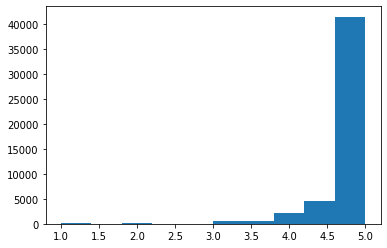

In [19]:
plt.hist(df.p_rtng) # heavily skewed to the left with some extreme outliers


In [20]:
sum(df.p_rtng < 4.5) # 5828 of c.32,000 not Retained: c.1%, better to cluster these seperately? cluster and predict !?
# eg was the retention rate very low!! Drivers chose not to serve them? ...user got tired of waiting for a ride?
#sum(df.p_rtng < 3.5) # 1004
# sum(df.p_rtng < 4)   # 1569

5828

In [21]:
bad_3= df[df.p_rtng < 3]
print(bad_3.shape)
print(sum(bad_3.active))
bad_3.head()                # so retention was just 39/348 = 11% vs. 37% generally!

(348, 11)
39


,dist,p_rtng,d_rtng,surge,city,phone,surge_pct,f_trips,b_user,wkday_pct,active
178,4.46,2.0,4.0,1.0,Astapor,iPhone,0.0,1,False,100.0,0
230,18.61,2.0,1.0,1.0,Winterfell,iPhone,0.0,1,True,100.0,0
311,4.07,2.5,5.0,1.0,Winterfell,Android,0.0,1,False,100.0,0
443,8.18,2.5,3.0,1.0,Winterfell,iPhone,0.0,0,True,100.0,0
579,2.23,2.0,4.0,1.0,Winterfell,iPhone,0.0,1,True,0.0,0


In [22]:
bad_3.describe() # Hmmm..25% of these users wkday_pct is zero, so just use at night (wee hours?)

,dist,p_rtng,d_rtng,surge,surge_pct,f_trips,wkday_pct,active
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,5.048506,1.530460,4.211782,1.073534,7.543103,0.698276,56.489655,0.112069
std,6.393796,0.578224,0.956973,0.303421,25.510599,0.633637,48.360037,0.315905
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.205000,1.000000,4.300000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.685000,1.000000,4.300000,1.000000,0.000000,1.000000,100.000000,0.000000
75%,5.747500,2.000000,5.000000,1.000000,0.000000,1.000000,100.000000,0.000000
max,53.850000,2.800000,5.000000,3.250000,100.000000,3.000000,100.000000,1.000000


(array([143.,   0.,   0.,   0.,   0.,  15.,   2.,   1.,   0., 187.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

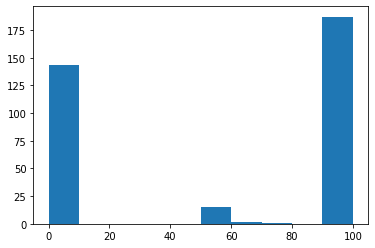

In [23]:
plt.hist(bad_3.wkday_pct)

In [24]:
g_bad_3= bad_3.groupby('active').p_rtng.mean() # Hmm...Here NOT active has a higher passenger rating!
g_bad_3  # NOT a significant difference!!  But ALL of these people had low ratings

active
0    1.530744
1    1.528205
Name: p_rtng, dtype: float64

In [25]:
bad_TH= df[df.p_rtng < 4.3] # TH is for the THreshold of 4.5 cited as problematic for passengers
print(bad_TH.shape)
print(sum(bad_TH.active))
bad_TH.head()               # <4: so retention was just 312/1569= c.20% vs. 37% generally!
                           # <4.01: so retention was just 693/3483= c.20% vs. 37% generally!
                            # < 4.3 so retention was just 943/3950= c.24% vs. 37% generally!
                           # < 4.5 so retention was just 1952/5828= c.33% vs. 37% generally!
        # Hmmm....This is surprising: not much penalty between 4 & 4.5

(3950, 11)
943


,dist,p_rtng,d_rtng,surge,city,phone,surge_pct,f_trips,b_user,wkday_pct,active
6,3.95,4.0,4.3,1.0,Astapor,Android,0.0,1,False,100.0,0
16,10.86,3.0,5.0,1.0,King's Landing,Android,0.0,1,True,50.0,1
20,2.53,3.0,4.3,1.0,Winterfell,Android,0.0,1,False,50.0,0
45,3.00,4.2,4.0,1.0,Astapor,Android,0.0,3,False,50.0,0
72,0.00,3.0,5.0,1.0,Astapor,iPhone,0.0,1,False,100.0,0


In [26]:
bad_TH= df[df.p_rtng < 4.3] # TH is for the THreshold of 4.5 cited as problematic for passengers
print(bad_TH.shape)
print(sum(bad_TH.active))   # TH 4.3, active is 943/3950= 24% 
                            # TH 4.4   active is 1426/4968= 29%( Too high!)

(3950, 11)
943


In [27]:
bad_TH.describe()  # same pattern ...> 25% weekends only, and median weekends is 40%

,dist,p_rtng,d_rtng,surge,surge_pct,f_trips,wkday_pct,active
count,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000
mean,5.349187,3.592430,4.392051,1.068651,7.600532,1.270127,57.930937,0.238734
std,5.547057,0.763239,0.732094,0.248980,21.038095,1.888831,41.445796,0.426364
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.010000,3.300000,4.300000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.480000,4.000000,4.300000,1.000000,0.000000,1.000000,66.700000,0.000000
75%,6.507500,4.000000,5.000000,1.000000,0.000000,2.000000,100.000000,0.000000
max,73.880000,4.200000,5.000000,5.000000,100.000000,37.000000,100.000000,1.000000


In [28]:
# plt.hist(bad_4.wkday_pct) # strongly bimodal!

In [29]:
bad_TH.corr()

,dist,p_rtng,d_rtng,surge,surge_pct,f_trips,b_user,wkday_pct,active
dist,1.000000,0.002536,-0.000162,-0.039755,-0.054531,-0.107582,0.045958,0.085246,-0.009374
p_rtng,0.002536,1.000000,0.097583,-0.005829,0.005009,0.172963,0.064000,0.021386,0.146403
d_rtng,-0.000162,0.097583,1.000000,-0.008739,0.004413,0.008054,-0.005782,-0.017843,0.029771
surge,-0.039755,-0.005829,-0.008739,1.000000,0.791049,0.001066,-0.056713,-0.108211,-0.025781
surge_pct,-0.054531,0.005009,0.004413,0.791049,1.000000,0.006954,-0.085472,-0.131297,-0.021659
f_trips,-0.107582,0.172963,0.008054,0.001066,0.006954,1.000000,0.025279,0.027600,0.084355
b_user,0.045958,0.064000,-0.005782,-0.056713,-0.085472,0.025279,1.000000,-0.019653,0.192240
wkday_pct,0.085246,0.021386,-0.017843,-0.108211,-0.131297,0.027600,-0.019653,1.000000,0.012211
active,-0.009374,0.146403,0.029771,-0.025781,-0.021659,0.084355,0.192240,0.012211,1.000000


# Exclude the Users Deemed Undesirable by Drivers 

(passenger rating > = 4.3)  df_D (d= desirable users)

In [30]:
df_D = df[df.p_rtng >= 4.3] # we have lost c 5,800 users, so 11.6% of the total (could try lowest decile w quantile()??)
df_D.describe()

,dist,p_rtng,d_rtng,surge,surge_pct,f_trips,wkday_pct,active
count,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000
mean,5.833768,4.880311,4.566850,1.074891,8.926869,2.372614,61.217846,0.378045
std,5.674325,0.186939,0.557133,0.218081,19.752932,3.907521,36.599801,0.484904
min,0.000000,4.300000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.460000,4.800000,4.300000,1.000000,0.000000,0.000000,33.300000,0.000000
50%,3.920000,5.000000,4.800000,1.000000,0.000000,1.000000,66.700000,0.000000
75%,6.980000,5.000000,5.000000,1.060000,9.100000,3.000000,100.000000,1.000000
max,129.890000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000


In [31]:
g_D= df_D.groupby('active').p_rtng.mean() # Hmm...Here NOT active has a higher passenger rating!
g_D

active
0    4.919428
1    4.815958
Name: p_rtng, dtype: float64

(array([ 1018.,   860.,  2424.,     0.,  2078.,  3330.,     0.,  4537.,
         3094., 28508.]),
 array([4.3 , 4.37, 4.44, 4.51, 4.58, 4.65, 4.72, 4.79, 4.86, 4.93, 5.  ]),
 <a list of 10 Patch objects>)

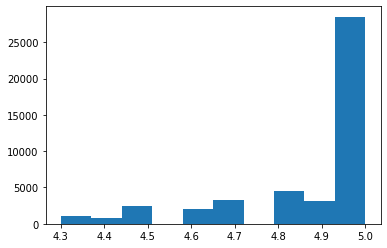

In [32]:
plt.hist(df_D.p_rtng) # still heavily skewed to the left (but the most extreme outliers removed)
# DWW this seemto be a rverse exponential distribution!!!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45849 entries, 0 to 49999
Data columns (total 11 columns):
dist         45849 non-null float64
p_rtng       45849 non-null float64
d_rtng       45849 non-null float64
surge        45849 non-null float64
city         45849 non-null object
phone        45849 non-null object
surge_pct    45849 non-null float64
f_trips      45849 non-null int64
b_user       45849 non-null bool
wkday_pct    45849 non-null float64
active       45849 non-null int64
dtypes: bool(1), float64(6), int64(2), object(2)
memory usage: 3.9+ MB


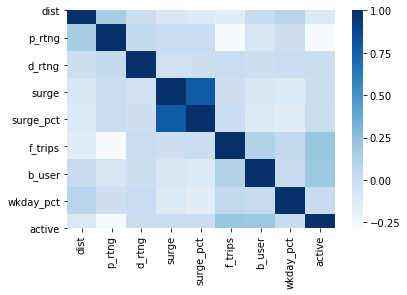

In [33]:
cor= df_D.corr() # surge and surge_pct are highly correlated, as one would expect
# weekday_pct is correlated with surge and surge_pct (0.11 & 0.15): driver and user ratings are only weakly related.
cor              # Mostly the variables are relatively independent, so multicollinearity not an issue

import seaborn as sns
sns.heatmap(cor, cmap= 'Blues')

df_D.info()

# Adding Dummies

In [34]:
# Using pandas’ get_dummies:  First we define the list of categorical features that we will want to process:
cat_columns = ['city','phone','b_user']
df_wdummies= pd.get_dummies(df_D, columns= cat_columns, drop_first= True) 
# drop_first is needed to prevent excess dummies! Otherwise dummies are very hard to interpret
df_wdummies.info()     # with the dummies we now have 12 variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45849 entries, 0 to 49999
Data columns (total 12 columns):
dist                   45849 non-null float64
p_rtng                 45849 non-null float64
d_rtng                 45849 non-null float64
surge                  45849 non-null float64
surge_pct              45849 non-null float64
f_trips                45849 non-null int64
wkday_pct              45849 non-null float64
active                 45849 non-null int64
city_King's Landing    45849 non-null uint8
city_Winterfell        45849 non-null uint8
phone_iPhone           45849 non-null uint8
b_user_True            45849 non-null uint8
dtypes: float64(6), int64(2), uint8(4)
memory usage: 3.3 MB


In [35]:
from sklearn.tree import DecisionTreeClassifier         # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split    # Import train_test_split function
from sklearn import metrics                             # Import scikit-learn metrics module for accuracy calculation

# list(df_wdummies.columns.values)
y = df_wdummies['active']                      # Target variable 
X = df_wdummies.drop('active', axis=1)         # Features

feature_cols= list(X.columns.values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [36]:
# Create Decision Tree classifer object
dtree = DecisionTreeClassifier(random_state=3, criterion='entropy',splitter='best', max_depth= 2,
                                 min_samples_split=2)     

dtree = dtree.fit(X_train,y_train)          # Train Decision Tree Classifer

y_pred = dtree.predict(X_test)            # Predict the response for test dataset

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #This is for the Test Set: Tree diagram is for the Train Set
# NB 2-level accuracy of 0.732, but data is imbalanced: only 36.6% adopted, so 63% accuracy by predicting not 'active' always!
# NB 3-level accuracy of 0.748
# NB 4-level accuracy of 0.749
# NB 5-level accuracy of 0.758

Accuracy: 0.7339876408578698


In [37]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

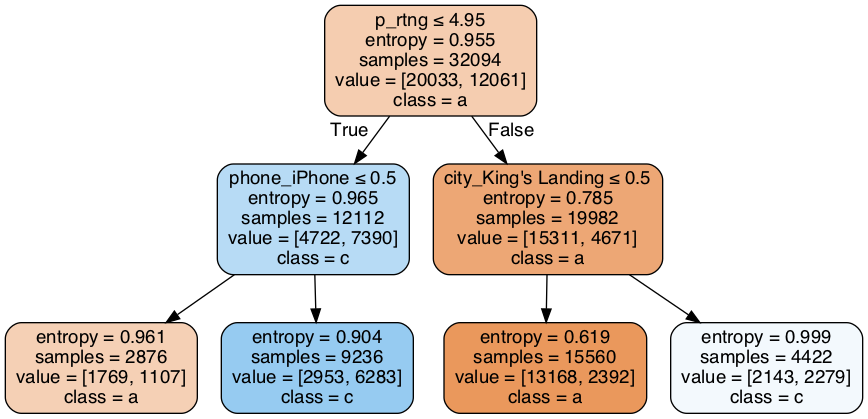

In [38]:
# Add graphics to understand which variables selected for Tree and parameter breaks!
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, special_characters=True,filled=True, rounded=True,
                        feature_names= feature_cols,  
                        class_names= 'active')
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
# Class C is retained (38% overall)
# Depth-2: Largest leaf is 6482 of 12349, and depends on p_rtng < 4.95 and iPhone (since < 0.5 = False means 1 !)

In [39]:
dtree.feature_importances_
f_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(dtree.feature_importances_))], axis = 1)
f_importances.columns= ['Feature', 'Importance']
f_importances
# With a max_depth of 5, the Accuracy rises to 75%
# together the features 'passenger rating' and 'City King's Landing' account for 72% of the aggregate importance,
# with the 'iPhone' feature being third with 15%, and no other feature exceeding 8%.
# the other Six of the ten variables are all less than 3%: at first glance, they would appear unimportant.

,Feature,Importance
0,dist,0.000000
1,p_rtng,0.599986
2,d_rtng,0.000000
3,surge,0.000000
4,surge_pct,0.000000
5,f_trips,0.000000
6,wkday_pct,0.000000
7,city_King's Landing,0.296179
8,city_Winterfell,0.000000
9,phone_iPhone,0.103835


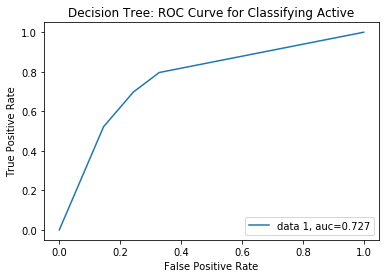

In [40]:
import numpy as np
# yp_pred # shows labels, not probabilities! how do we show probabilities?
probs = dtree.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_t = probs[:, 1]
probs.round(decimals= 2)

fpr_t, tpr_t, prob_t = metrics.roc_curve(y_test, probs_t)   # Third argument should be probs, not Labels!!! Sarkar
auc = metrics.roc_auc_score(y_test, y_pred)               # But we get the same kinked curve as probs = 1.0 or 0.0
plt.plot(fpr_t,tpr_t,label="data 1, auc="+str(auc.round(3)))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Decision Tree: ROC Curve for Classifying Active")
plt.show()
# with an AUC of 0.73, this model appears to have some predictive power

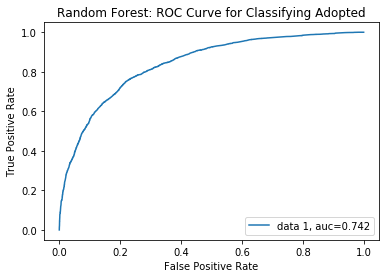

In [41]:
# Random Forest Classifier ...vnow less than Decision Tree...max_depth, n_estimators REVISIT !!!

# Try a RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# Limit max depth
forest = RandomForestClassifier(max_depth = 5, n_estimators= 50) # n_estimators increased from 5 to 50

forest.fit(X_train,y_train)              # Train
y_pred_F = forest.predict(X_test)      # Predict the response for test dataset
probs_F = forest.predict_proba(X_test)
probs_F = probs_F[:, 1]


fpr_F, tpr_F, probs_F = metrics.roc_curve(y_test, probs_F)   # Third argument should be probs, not Labels!!! Sarkar
auc = metrics.roc_auc_score(y_test, y_pred_F)               # But we get the same kinked curve as probs = 1.0 or 0.0
plt.plot(fpr_F,tpr_F,label="data 1, auc="+str(auc.round(3)))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Random Forest: ROC Curve for Classifying Adopted")
plt.show()

# Logistic Regression

In [42]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg_L2 = LogisticRegression(penalty='l2', C=10000, solver='sag', max_iter= 10000) 
# 'saga' solver better for larger datasets but NOT for multiclass: hi C of 10000 to minimise L2 Regularization Penalty
# no change in either Train or Test accuracy
logreg_L2.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg_L2.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg_L2.score(X_test, y_test)))

# ConvergenceWarning: The max_iter was reached which means the coef_ did not converge (with saga as solver: try 'sag')
# max_iter increased to 10,000 from 100 and convergence realised!

Accuracy of Logistic regression classifier on training set: 0.74
Accuracy of Logistic regression classifier on test set: 0.74


In [43]:
probs_L_L2 = logreg_L2.predict_proba(X_test)
# probs
probs_L_L2 = probs_L_L2[:, 1]
probs_L_L2.round(decimals= 2)

fpr_L_L2, tpr_L_L2, prob_L_L2 = metrics.roc_curve(y_test, probs_L_L2) 

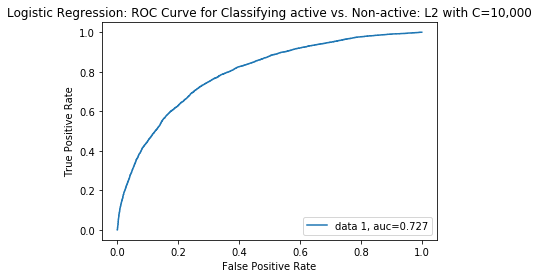

In [44]:
# fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_F)        # Third argument should be probs, not Labels!!! Sarkar
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr_L_L2,tpr_L_L2,label="data 1, auc="+str(auc.round(3)))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Logistic Regression: ROC Curve for Classifying active vs. Non-active: L2 with C=10,000")
plt.show()

In [45]:
logreg_L2.coef_   # OK now:  only one dummy, as the other is the base case !!!!

array([[-3.17259227e-02, -2.51151489e+00,  2.68831866e-02,
         4.70122303e-02,  2.42231969e-03,  7.74226999e-02,
         1.23611779e-03,  1.84014436e+00,  4.89900707e-01,
         1.14945147e+00,  8.71790307e-01]])

In [46]:
X.columns

Index(['dist', 'p_rtng', 'd_rtng', 'surge', 'surge_pct', 'f_trips',
       'wkday_pct', 'city_King's Landing', 'city_Winterfell', 'phone_iPhone',
       'b_user_True'],
      dtype='object')

In [47]:
df_coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logreg_L2.coef_))], axis = 1)
df_coefficients.columns= ['Feature', 'SK_Coefficient']
df_coefficients  # coefficients are the log odds: no idea of statistical significance unless use StatsModel package.


,Feature,SK_Coefficient
0,dist,-0.031726
1,p_rtng,-2.511515
2,d_rtng,0.026883
3,surge,0.047012
4,surge_pct,0.002422
5,f_trips,0.077423
6,wkday_pct,0.001236
7,city_King's Landing,1.840144
8,city_Winterfell,0.489901
9,phone_iPhone,1.149451


In [48]:
df_coefficients['SK_odds']= np.exp(df_coefficients.SK_Coefficient)
df_coefficients

,Feature,SK_Coefficient,SK_odds
0,dist,-0.031726,0.968772
1,p_rtng,-2.511515,0.081145
2,d_rtng,0.026883,1.027248
3,surge,0.047012,1.048135
4,surge_pct,0.002422,1.002425
5,f_trips,0.077423,1.080499
6,wkday_pct,0.001236,1.001237
7,city_King's Landing,1.840144,6.297447
8,city_Winterfell,0.489901,1.632154
9,phone_iPhone,1.149451,3.156461


In [49]:
# compare with statsmodels
import statsmodels.api as sm
sm_model = sm.Logit(y, sm.add_constant(X)).fit(disp=0)
print(sm_model.pvalues)
sm_model.summary()

const                  5.856793e-256
dist                    4.341901e-42
p_rtng                  0.000000e+00
d_rtng                  4.319068e-01
surge                   1.629120e-01
surge_pct               6.517828e-06
f_trips                7.567874e-112
wkday_pct               1.945935e-03
city_King's Landing     0.000000e+00
city_Winterfell         7.360955e-79
phone_iPhone            0.000000e+00
b_user_True             0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 active   No. Observations:                45849
Model:                          Logit   Df Residuals:                    45837
Method:                           MLE   Df Model:                           11
Date:                Fri, 20 Sep 2019   Pseudo R-squ.:                  0.2015
Time:                        11:25:39   Log-Likelihood:                -24276.
converged:                       True   LL-Null:                       -30402.
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.0355      0.323     34.174      0.000      10.403      11.668
dist                   -0.0305      0.002    -13.594      0.000      -0.035      -0.026
p_rtng                 -2.7595      0.062    -44.780      0.000      -2.880      -2.639
d_rtng                  0.0159      0.020      0.786      0.432      -0.024       0.056
surge                  -0.1221      0.088     -1.395      0.163      -0.294       0.049
surge_pct               0.0043      0.001      4.509      0.000       0.002       0.006
f_trips                 0.0785      0.003     22.473      0.000       0.072       0.085
wkday_pct               0.0010      0.000      3.098      0.002       0.000       0.002
city_King's Landing     1.8685      0.032     59.188      0.000       1.807       1.930
city_Winterfell         0.4971      0.026     18.801      0.000       0.445       0.549
phone_iPhone            1.1351      0.027     42.530      0.000       1.083       1.187
b_user_True             0.8754      0.023     38.128      0.000       0.830       0.920
=======================================================================================
"""

In [50]:
# The repetitive calculations set forth below have been superceded by this short function

def get_prob(logistic_regression_coefficient, baseline_prob= 0.378):
    base_odds= baseline_prob/(1 - baseline_prob)
    logistic_odds_factor= np.exp(logistic_regression_coefficient)
    revised_odds= base_odds * logistic_odds_factor
    revised_probability= revised_odds/(1 + revised_odds)
    revised_probability= revised_probability.round(3)
    return(revised_probability)

In [51]:
# df['score_change'] = pre_post_difference(df['preTestScore'], df['postTestScore']) Where function is pre_post_difference()
# df_coefficients['revised_prob']= get_prob(df_coefficients['SM_params'])

In [52]:
sm_coeff= sm_model.params.tolist()
type(sm_coeff)  # series
sm_coeff= pd.Series(sm_coeff[1:])

In [53]:
df_coefficients['SM_params']= sm_coeff
df_coefficients
# the first and the last seven parameters are similar, but 


,Feature,SK_Coefficient,SK_odds,SM_params
0,dist,-0.031726,0.968772,-0.030494
1,p_rtng,-2.511515,0.081145,-2.759520
2,d_rtng,0.026883,1.027248,0.015929
3,surge,0.047012,1.048135,-0.122145
4,surge_pct,0.002422,1.002425,0.004334
5,f_trips,0.077423,1.080499,0.078504
6,wkday_pct,0.001236,1.001237,0.000988
7,city_King's Landing,1.840144,6.297447,1.868511
8,city_Winterfell,0.489901,1.632154,0.497090
9,phone_iPhone,1.149451,3.156461,1.135089


In [54]:
# df['score_change'] = pre_post_difference(df['preTestScore'], df['postTestScore']) Where function is pre_post_difference()
# Much faster than  .apply()
df_coefficients['revised_prob']= get_prob(df_coefficients['SM_params'])
df_coefficients

,Feature,SK_Coefficient,SK_odds,SM_params,revised_prob
0,dist,-0.031726,0.968772,-0.030494,0.371
1,p_rtng,-2.511515,0.081145,-2.759520,0.037
2,d_rtng,0.026883,1.027248,0.015929,0.382
3,surge,0.047012,1.048135,-0.122145,0.350
4,surge_pct,0.002422,1.002425,0.004334,0.379
5,f_trips,0.077423,1.080499,0.078504,0.397
6,wkday_pct,0.001236,1.001237,0.000988,0.378
7,city_King's Landing,1.840144,6.297447,1.868511,0.797
8,city_Winterfell,0.489901,1.632154,0.497090,0.500
9,phone_iPhone,1.149451,3.156461,1.135089,0.654


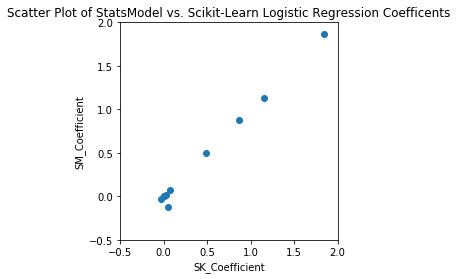

In [55]:
plt.scatter(df_coefficients.SK_Coefficient, df_coefficients.SM_params)
plt.title('Scatter Plot of StatsModel vs. Scikit-Learn Logistic Regression Coefficents')
plt.xlabel('SK_Coefficient')
plt.ylabel('SM_Coefficient')    # throws an error!!  ...but not after 'title' added !?     '
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()# how can 

In [56]:
X2 = X.drop('d_rtng', axis=1) # drop d_rtng as a not significant variable: "Parsimonious Model _P" P1 is first round
sm_model_P1 = sm.Logit(y, sm.add_constant(X2)).fit(disp=0)
# print(sm_model.pvalues)
sm_model_P1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 active   No. Observations:                45849
Model:                          Logit   Df Residuals:                    45838
Method:                           MLE   Df Model:                           10
Date:                Fri, 20 Sep 2019   Pseudo R-squ.:                  0.2015
Time:                        11:26:03   Log-Likelihood:                -24277.
converged:                       True   LL-Null:                       -30402.
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.0995      0.313     35.515      0.000      10.487      11.712
dist                   -0.0305      0.002    -13.595      0.000      -0.035      -0.026
p_rtng                 -2.7573      0.062    -44.793      0.000      -2.878      -2.637
surge                  -0.1239      0.087     -1.417      0.157      -0.295       0.048
surge_pct               0.0043      0.001      4.524      0.000       0.002       0.006
f_trips                 0.0786      0.003     22.512      0.000       0.072       0.085
wkday_pct               0.0010      0.000      3.108      0.002       0.000       0.002
city_King's Landing     1.8697      0.032     59.288      0.000       1.808       1.931
city_Winterfell         0.4960      0.026     18.786      0.000       0.444       0.548
phone_iPhone            1.1347      0.027     42.525      0.000       1.082       1.187
b_user_True             0.8754      0.023     38.128      0.000       0.830       0.920
=======================================================================================
"""

In [57]:
X3 = X2.drop('surge', axis=1) # drop 'surge' as the only not significant variable: "Parsimonious Model _P"
sm_model_P2 = sm.Logit(y, sm.add_constant(X3)).fit(disp=0)
# print(sm_model.pvalues)
sm_model_P2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 active   No. Observations:                45849
Model:                          Logit   Df Residuals:                    45839
Method:                           MLE   Df Model:                            9
Date:                Fri, 20 Sep 2019   Pseudo R-squ.:                  0.2015
Time:                        11:26:04   Log-Likelihood:                -24278.
converged:                       True   LL-Null:                       -30402.
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.9809      0.301     36.492      0.000      10.391      11.571
dist                   -0.0305      0.002    -13.596      0.000      -0.035      -0.026
p_rtng                 -2.7582      0.062    -44.809      0.000      -2.879      -2.638
surge_pct               0.0033      0.001      5.543      0.000       0.002       0.004
f_trips                 0.0786      0.003     22.527      0.000       0.072       0.085
wkday_pct               0.0010      0.000      3.085      0.002       0.000       0.002
city_King's Landing     1.8713      0.032     59.376      0.000       1.810       1.933
city_Winterfell         0.4952      0.026     18.760      0.000       0.443       0.547
phone_iPhone            1.1344      0.027     42.516      0.000       1.082       1.187
b_user_True             0.8748      0.023     38.111      0.000       0.830       0.920
=======================================================================================
"""

# Interpretation

In [59]:
df_D.active.sum()/len(df_D)

0.3780453226896988

In [60]:
# The repetitive calculations set forth below have been superceded by this short function

def get_prob(logistic_regression_coefficient, baseline_prob= 0.378):
    base_odds= baseline_prob/(1 - baseline_prob)
    logistic_odds_factor= np.exp(logistic_regression_coefficient)
    revised_odds= base_odds * logistic_odds_factor
    revised_probability= revised_odds/(1 + revised_odds)
    revised_probability= revised_probability.round(3)
    print(revised_probability)
    

In [61]:
print(get_prob(1.810))  # King's Landing
print(get_prob(0.547))  # Winterfel
print(get_prob(1.187))  # iPhone
print(get_prob(-2.638)) # passenger_rating  
print(get_prob(0.920))  # black_user
print(get_prob(0.0786))  # f_trips

0.788
None
0.512
None
0.666
None
0.042
None
0.604
None
0.397
None


In [62]:
print(get_prob(1.810))  # f_trips # why is None returned by the function??

0.788
None


In [63]:
# Numerical Ilustration for the Relative Importance of Cities
# Baseline probability of 'active' after six months is 0.378, so the odds are: p/(1-p)= 0.378/(1-0.378)= 0.607
print(df_D.active.mean()) # 37.8%
df_D.groupby('active').mean()

0.3780453226896988


,dist,p_rtng,d_rtng,surge,surge_pct,f_trips,b_user,wkday_pct
active,,,,,,,,
0,6.277254,4.919428,4.561313,1.075188,8.740756,1.715668,0.304671,60.489150
1,5.104152,4.815958,4.575959,1.074404,9.233058,3.453413,0.513702,62.416685


In [64]:
# For the city of Kings Landing, the log(odds)= 1.8631, and odds-multiplier is np.exp(1.861)= 6.43
# So the revised odds are 0.61 x 6.43 = 4.11
# The revised probability is simply: new_odds/(1 + new_odds)= 4.11/(1+4.11)= 0.804
# FINAL: 0.797

In [65]:
# Conversely,For the city of Winterfell, the log(odds)= 0.497, and odds-multiplier is np.exp(0.4971)= 1.64
# So the revised odds are 0.64 x 1.64 = 1.05
# The revised probability is simply: new_odds/(1 + new_odds)= 1.05/(1+1.05)= 0.512

In [66]:
# Numerical Interpretation for the binary variable 'phone-iPhone'
# The value of the coefficient is 1.1326, and odds-multiplier is np.exp(1.1326)= 3.10.
# So the revised odds are 0.64 x 3.10 = 1.98
# The revised probability is simply: new_odds/(1 + new_odds)= 1.98/(1+1.98)= 0.664
# So ownership of an iPhone is associated with an increase in Retention from the Baseline of 39% to 66.4% ()

In [67]:
# Numerical Interpretation for the continuous variable 'p_rtng'
# The value of the coefficient is -2.49. The lowest quartile has a value of 4.80
# so the prorated value is 0.2 * -2.49 = -0.5. np.exp(-0.5) = 0.61
# So the revised odds are 0.64 x 0.61 = 0.39
#The revised probability is simply: new_odds/(1 + new_odds)= 0.39/(1 + 0.39)= 0.28
# This has the counterintuitive implication that for a passenger for whom the rating increases from 4.8 to 5.0, 
# the probability of remaining active declines from 39% to 28% !!
# NB As shown by the histogram above (cell # XX), this variable is extremely left-skewed 
# and even the Box Power transformation did not improve it. Thos remains an unresolved matter for FUTURE WORK!

In [68]:
# since the p_rtng relationship in non-linear, a polynomial approach might be explored: add new features, square, cube

In [69]:
# While the readers concerned about 4.5 to 4.8 ratings have nothing to worry about, riders with much lower ratings
# are at risk of having drivers decline their ride request. DWW: increase threshold to 5 from 4.01 (really 4.1)
# This can leave you with longer wait times, and — if your rating drops too low — there’s the risk of being booted from Uber completely.

# As a former Uber driver, I wanted to share my thoughts on what causes lower Uber passenger ratings 
# and some ways that you can boost your Uber rating going forward. 1.Be ready at the pickup location.2.Don’t act drunk.
# 3. Act like the driver is a friend: 4. Don't take short trips! 5. Tip $5 for a Rating of 5 !!

In [70]:
df_D.groupby('city').active.mean() 
# this confirms the ordering, that King's Landing & Winterfell have higher Retention at 63% % 36% (vs 25% for Astapor)
# However, the above logistic regression-derived factors assume "everything else being the same". 
# King's Landing is actually 63% rather than the 80.4% calculated above, is due to countervailing factors: NOT equal!

city
Astapor           0.250622
King's Landing    0.628728
Winterfell        0.355330
Name: active, dtype: float64

In [71]:
sm_coeff_P2= sm_model_P2.params.tolist()
type(sm_coeff)  # series
sm_coeff_P2= pd.Series(sm_coeff_P2[1:])

In [72]:
1.05/(1+1.05)

0.5121951219512195

In [73]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.74


In [74]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))



Accuracy of GNB classifier on training set: 0.74
Accuracy of GNB classifier on test set: 0.74


In [75]:
# Support Vector Machine # Does not converge??
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 0.81
Accuracy of SVM classifier on test set: 0.76


# Logins

In [77]:
file=open('logins.json', 'r')
file_content=file.read()
file.close()
data= json.loads(file_content)
df_2= pd.DataFrame(data)

In [78]:
df_2.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [79]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null object
dtypes: object(1)
memory usage: 727.8+ KB


In [80]:
df_2['log']= pd.to_datetime(df_2.login_time)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 2 columns):
login_time    93142 non-null object
log           93142 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 1.4+ MB


In [81]:
df_2.head(10)

,login_time,log
0,1970-01-01 20:13:18,1970-01-01 20:13:18
1,1970-01-01 20:16:10,1970-01-01 20:16:10
2,1970-01-01 20:16:37,1970-01-01 20:16:37
3,1970-01-01 20:16:36,1970-01-01 20:16:36
4,1970-01-01 20:26:21,1970-01-01 20:26:21
5,1970-01-01 20:21:41,1970-01-01 20:21:41
6,1970-01-01 20:12:16,1970-01-01 20:12:16
7,1970-01-01 20:35:47,1970-01-01 20:35:47
8,1970-01-01 20:35:38,1970-01-01 20:35:38
9,1970-01-01 20:47:52,1970-01-01 20:47:52


In [82]:
df_2.set_index('log', inplace= True)


In [83]:
df_hourly= df_2.resample('H').count()
df_hourly =df_hourly.rename(columns = {'login_time':'freq'})
df_hourly["hours"] = df_hourly.index.hour
df_hourly['weekday']= df_hourly.index.weekday_name
#df["days"] = df_hourly.index.map(lambda x: x.strftime('%b-%d'))     
df_hourly.head()

,freq,hours,weekday
log,,,
1970-01-01 20:00:00,24,20,Thursday
1970-01-01 21:00:00,9,21,Thursday
1970-01-01 22:00:00,21,22,Thursday
1970-01-01 23:00:00,58,23,Thursday
1970-01-02 00:00:00,53,0,Friday


In [84]:
g= df_hourly.groupby(['hours','weekday']).freq.mean().round(0)
g # days ordered alphabetically, not chronologically!
df_g= pd.DataFrame(g)
piv_g = pd.pivot_table(df_g, values="freq",index=["hours"], columns=["weekday"], fill_value=0)
piv_g

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hours,,,,,,,
0,65,35,84,75,58,43,49
1,64,28,104,90,56,40,49
2,51,21,107,107,45,28,34
3,33,16,105,110,27,14,21
4,24,14,115,140,18,11,18
5,16,8,73,73,10,8,10
6,8,4,27,25,5,3,3
7,7,7,12,13,6,5,6
8,7,10,8,10,7,6,7


In [85]:
old_cols= list(piv_g.columns.values)
new_cols= ['Friday','Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday']

In [86]:
df_heat= piv_g[new_cols]

In [87]:
df_heat.head()

weekday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday
hours,,,,,,,
0,65,84,75,35,43,49,58
1,64,104,90,28,40,49,56
2,51,107,107,21,28,34,45
3,33,105,110,16,14,21,27
4,24,115,140,14,11,18,18


In [88]:
df_heat_H= df_heat.T
df_heat_H

hours,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,65,64,51,33,24,16,8,7,7,16,...,35,26,25,32,38,44,54,80,101,87
Saturday,84,104,107,105,115,73,27,12,8,8,...,51,51,48,43,43,46,47,58,77,67
Sunday,75,90,107,110,140,73,25,13,10,12,...,52,53,55,41,37,42,41,42,39,37
Monday,35,28,21,16,14,8,4,7,10,17,...,22,20,17,16,18,19,27,43,44,38
Tuesday,43,40,28,14,11,8,3,5,6,17,...,22,18,16,13,22,22,35,50,54,52
Wednesday,49,49,34,21,18,10,3,6,7,17,...,23,19,15,14,20,22,36,53,63,65
Thursday,58,56,45,27,18,10,5,6,7,18,...,28,20,17,17,25,28,41,58,73,69


In [89]:
print(df_heat_H) # Hmm...how to print ALL of it !! Perhaps as in cell #44 (not transposed)

hours      0    1    2    3    4   5   6   7   8   9  ...  14  15  16  17  18  \
weekday                                               ...                       
Friday     65   64   51   33   24  16   8   7   7  16 ...  35  26  25  32  38   
Saturday   84  104  107  105  115  73  27  12   8   8 ...  51  51  48  43  43   
Sunday     75   90  107  110  140  73  25  13  10  12 ...  52  53  55  41  37   
Monday     35   28   21   16   14   8   4   7  10  17 ...  22  20  17  16  18   
Tuesday    43   40   28   14   11   8   3   5   6  17 ...  22  18  16  13  22   
Wednesday  49   49   34   21   18  10   3   6   7  17 ...  23  19  15  14  20   
Thursday   58   56   45   27   18  10   5   6   7  18 ...  28  20  17  17  25   

hours      19  20  21   22  23  
weekday                         
Friday     44  54  80  101  87  
Saturday   46  47  58   77  67  
Sunday     42  41  42   39  37  
Monday     19  27  43   44  38  
Tuesday    22  35  50   54  52  
Wednesday  22  36  53   63  65  
Thursd

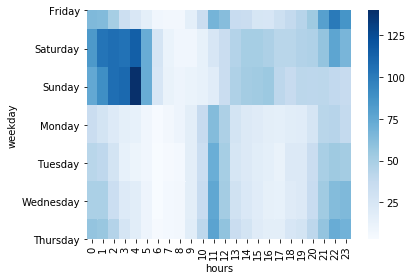

In [90]:
#plot pivot table as heatmap using seaborn
ax = sns.heatmap(df_heat_H, square= False, cmap= 'Blues') # False makes it square !!! inferno_r
plt.setp( ax.xaxis.get_majorticklabels(), rotation= 90 )  # , rotation=90
plt.tight_layout()
plt.show()

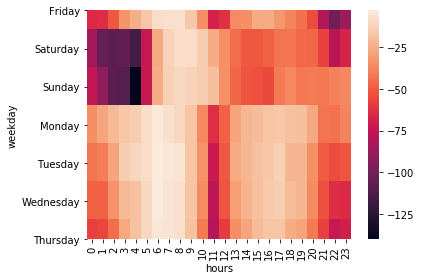

In [91]:
df_heat_HN= df_heat_H * -1
df_heat_HN.head() # OK
ax = sns.heatmap(df_heat_HN, square= False) # color is 'inferno_r' : _r reverses it from high to low!!
plt.setp( ax.xaxis.get_majorticklabels(), rotation= 90 )  # , rotation=90
plt.tight_layout()
plt.show()

# Assorted Code Not Ultimately Used but Retained for Personal Reference Only

In [ ]:
g= df_hourly.groupby(['hours','weekday']).freq.mean().round(0)
g # days ordered alphabetically, not chronologically!
df_g= pd.DataFrame(g)
piv_gH = pd.pivot_table(df_g, values="freq",index=["weekday"], columns=["hours"], fill_value=0)
piv_gH

In [ ]:
# create pivot table, days will be columns, hours will be rows
piv = pd.pivot_table(df_hourly, values="freq",index=["hours"], columns=["weekday"], fill_value=0)


In [ ]:
piv

In [ ]:
import seaborn as sns

In [ ]:
#plot pivot table as heatmap using seaborn
ax = sns.heatmap(piv, square=True)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= 90 )  # , rotation=90
plt.tight_layout()
plt.show()

In [ ]:
# Hmmm..Not square, days not ordered, better if rotated on side, and darker colors higher intensity!

In [ ]:
df_2['hour']= df_2['log'].dt.hour                 # do need .dt !
df_2['weekday']= df_2['log'].dt.weekday_name
df_2.head()
df_2.tail()

In [ ]:
df_2.set_index('log', inplace= True)
dfheat= df_2.resample('H').count()


In [ ]:
dfheat.head()
dfheat

In [ ]:
dfheat.groupby(['hour','weekday'])


In [ ]:

df_2.log.resample("W")

In [ ]:
# df= pd.read_json(r'logins.json')
df= pd.read_json(r'C:/Users/user/Desktop/logins.json')
# C:\Users\Ron\Desktop\data.json

In [ ]:
%matplotlib inline
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# load json data as string and print keys.
json_string=json.load((open('logins.json')))
json_string[0].keys()

In [ ]:
This web site can tell you that there is a Nan somewhere in your json file.   https://jsonlint.com/
The workaround is to read it as a string then use json.loads (which handles nan) Example code below should work:

In [ ]:
file=open('ultimate_data_challenge.json', 'r')
file_content=file.read()
file.close()
data=json.loads(file_content)
df=pd.DataFrame(data)  # FileNotFoundError: [Errno 2] No such file or directory: 'logins.json'

In [ ]:
file=open('logins.json', 'r')
file_content=file.read()
file.close()
data=json.loads(file_content)
df=pd.DataFrame(data)    #. FileNotFoundError: [Errno 2] No such file or directory: 'logins.json'

In [ ]:
# Function to explore trade off between threhold and 'active'

# print(np.linspace(1.0, 5.0, num = 5))
seq= np.linspace(4.0,4.5,num=51)
for x in seq:
    print(x**2)

TH= np.linspace(4,4.5,num=51)
x= [sum(df.p_rtng < TH[i]) for i in range(len(TH))]  # NEED TO SUM DF.ACTIVE() !!!!
len(x) # list

y= [len(df.p_rtng < TH[j]) for j in range(len(TH))]
len(y)

retention_rates= np.asarray(x)/np.asarray(y)
retention_rates

sum(df.p_rtng < 4.0)

df[i]= df[df.p_rtng < TH[i]]

def get_pct_active(threshold):
    TH= np.linspace(4,threshold,num=51)
    for i in TH:
        x= [sum(df.p_rtng < TH[[i]] for i in TH]
        y= [len(df.p_rtng < TH[[j]] for j in TH]
    return x,y            

get_pct_active(4.5)

def get_pct_active(threshold):
    TH= np.linspace(4.0,4.5,num=51)
    for i in TH:
        x[i]= sum(df.p_rtng < TH)
        y[i]= len(df.p_rtng < TH)
        
prop_A= x1/x2
plt.plot(TH, prop_A)

In [ ]:
# Possible Pre-Processing to deal with skew

from sklearn.preprocessing import PolynomialFeatures, PowerTransformer # OK
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)

pt = preprocessing.PowerTransformer(method='Yeo-Johnson', standardize=False)   # name 'preprocessing' is not defined

from sklearn import preprocessing
# centered_scaled_data = preprocessing.scale(original_data)
# For Box-Cox you can use boxcox from scipy:

from scipy.stats import boxcox
boxcox_transformed_data = boxcox(df_D.p_rtng)
plt.hist(boxcox_transformed_data)


For calculation of skewness you can use skew from scipy:

from scipy.stats import skew
skness = skew(original_data)


pt.fit_transform(df_D.p_rtng) 

from sklearn.preprocessing import StandardScaler  # OK
scaler = StandardScaler()
scaler.fit_transform(df_D.p_rtng.values.reshape(-1, 1))

# Optional Preprocessing to deal with heavy skew (skip for now: revisit )

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X.f3.values.reshape(-1, 1))

from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
transformed= pt.fit_transform(df.p_rtng.values.reshape(-1, 1))
plt.hist(transformed)
# DWW: seperate analysis for passenger rating < 4: then transform the remainder 

## We are using PowerTransformer to perform a Yeo-Johnson power transformation on our X-data
## in order to ensure that our features are normally distributed. 
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)
X_val_pt = pt.transform(X_val)
## Here we are doing the same thing, but for the dependent variable 'SalePrice' exclusively
pt_y = PowerTransformer()
# PowerTransformer requires a matrix/DataFrame
pt_y.fit(y_train.to_frame())
 
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())

from scipy.stats import boxcox
boxcox_transformed_data = boxcox(original_data)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer # name 'preprocessing' is not defined
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [ ]:
# Redo for every 15 minutes

df_15min= df_2.resample('15T').count()
df_15min =df_15min.rename(columns = {'login_time':'freq'})
df_15min['weekday']= df_15min.index.weekday_name
df_15min

plt.plot(df_15min.freq)

df_15min["quarters"] = df_hourly.index.hour
df_hourly['weekday']= df_hourly.index.weekday_name
#df["days"] = df_hourly.index.map(lambda x: x.strftime('%b-%d'))     
df_hourly.head()